In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Datasets/

In [ ]:
import numpy as np
import tensorflow as tf

import os
import cv2
import random

from PIL import Image
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

/bin/bash: line 1: nvidia-smi: command not found
Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
path = "Images"
categories = os.listdir(path)

def load_images_and_labels(categories, im_ = 1):
    img_lst=[]
    labels=[]
    for category in tqdm(categories):
        folder = os.listdir(path+"/"+category)
        random.seed(20)                        # shuffle because they are organized as coming from list_dir function
        folder = random.choices(folder, k = im_) # here limites the number of images per categories
        for image_name in folder:
            img = cv2.imread(path+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)     # keeps RGB columns
            img = cv2.resize(img,(224, 224), interpolation=cv2.INTER_AREA)  # resize image to 224 x 224 because the input image resolution for AlexNet is 227 x 227
            img_array = Image.fromarray(img, 'RGB')        #.  'RGB' / 'L'   for color or grey scale
            img_lst.append(np.array(img_array))
            labels.append(category[10:])
    print("images loaded")
    return img_lst, labels

img_lst, labels = load_images_and_labels(categories, im_=100)

100%|██████████| 10/10 [00:25<00:00,  2.59s/it]

images loaded


In [ ]:
def normalize_(images,labels):
  images = np.array(images)
  labels = np.array(labels)
  print("\n==> Necessary to normalize images' pixels")
  images = images.astype(np.float32)                      #### not necessary if using image transfo function ?!?
  images = images/255
  print("\n\n*** images format after normalisation ***\n\n",images[1][:2])
  print("\nShapes:\nImages shape ",images.shape,"Labels shape = ",labels.shape)
  return (images,labels)

images, labels = normalize_(img_lst,labels)


==> Necessary to normalize images' pixels


*** images format after normalisation ***

 [[[0.13725491 0.12941177 0.07843138]
  [0.14509805 0.13725491 0.08627451]
  [0.15686275 0.14901961 0.09803922]
  ...
  [0.21568628 0.20392157 0.14509805]
  [0.21176471 0.2        0.14117648]
  [0.20392157 0.19215687 0.13333334]]

 [[0.13725491 0.12941177 0.07843138]
  [0.14901961 0.14117648 0.09019608]
  [0.16078432 0.15294118 0.10196079]
  ...
  [0.21568628 0.20392157 0.14509805]
  [0.21176471 0.2        0.14117648]
  [0.20784314 0.19607843 0.13725491]]]

Shapes:
Images shape  (1000, 224, 224, 3) Labels shape =  (1000,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
enc_label = label_enc.fit_transform(labels)

# split to learn model
x_train, x_test, y_train, y_test = train_test_split(images, enc_label, train_size = 0.8, random_state = 42, stratify=labels)

x_train = x_train.astype('float32')
y_train = y_train.astype('int32')
x_test = x_test.astype('float32')
y_test = y_test.astype('int32')

for i in range(10):
  print(i)
  random.seed(i)
  print(f"label:{random.choice(labels)}, encoded:{random.choice(enc_label)}")

0
label:Great_Pyrenees, encoded:6
1
label:Afghan_hound, encoded:3
2
label:Leonberg, encoded:2
3
label:Scottish_deerhound, encoded:1
4
label:Scottish_deerhound, encoded:6
5
label:Bernese_mountain_dog, encoded:8
6
label:Great_Pyrenees, encoded:3
7
label:Pomeranian, encoded:4
8
label:Scottish_deerhound, encoded:6
9
label:Samoyed, encoded:1


In [ ]:
label_enc.get_params()

{}

In [ ]:
new_model = tf.keras.models.load_model('model_vgg16_fine_tuned_10cat_210img_tuned.keras')
new_model.summary()
loss, acc = new_model.evaluate(x_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
def display_evolution(img_path,heatmap)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Model

def show_imgwithheat(img_path, heatmap, alpha=0.4):
    """Show the image with heatmap.

    Args:
        img_path: string.
        heatmap: image array, get it by calling grad_cam().
        alpha: float, transparency of heatmap.
        return_array: bool, return a superimposed image array or not.
    Return:
        None or image array.
    """
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = (heatmap*255).astype("uint8")
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype("uint8")
    superimposed_img = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

    imgwithheat = Image.fromarray(superimposed_img)
    # error tracking
    try:
        display(imgwithheat)
    except NameError:
        imgwithheat.show()


def grad_cam(model, img,
             layer_name="block5_conv3", label_name=None,
             category_id=None):
    """Get a heatmap by Grad-CAM.

    Args:
        model: A model object, build from tf.keras 2.X.
        img: An image ndarray.
        layer_name: A string, layer name in model.
        label_name: A list or None,
            show the label name by assign this argument,
            it should be a list of all label names.
        category_id: An integer, index of the class.
            Default is the category with the highest score in the prediction.

    Return:
        A heatmap ndarray(without color).
    """
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape(watch_accessed_variables=False, persistent=True) as gtape:
        gtape.watch(tf.convert_to_tensor(img_tensor, dtype = "float32"))

        conv_output, predictions = heatmap_model(img_tensor)
        if category_id is None:
            category_id = np.argmax(predictions[0])
        if label_name is not None:
            print(label_name[category_id])
        output = predictions[:, category_id]
        grads = gtape.gradient(output, conv_output)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return np.squeeze(heatmap)

def grad_cam_plus(model, img,
                  layer_name="block5_conv3", label_name=None,
                  category_id=None):
    """Get a heatmap by Grad-CAM++.

    Args:
        model: A model object, build from tf.keras 2.X.
        img: An image ndarray.
        layer_name: A string, layer name in model.
        label_name: A list or None,
            show the label name by assign this argument,
            it should be a list of all label names.
        category_id: An integer, index of the class.
            Default is the category with the highest score in the prediction.

    Return:
        A heatmap ndarray(without color).
    """
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                if label_name is not None:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap

In [ ]:
to_explain = ['block1_conv2', 'block2_conv2', 'block3_conv3', 'block4_conv3', 'block5_conv3']

In [ ]:
_analyse

'Images/n02085936-Maltese_dog/n02085936_20076.jpg'

Bad pred
Images/n02085936-Maltese_dog/n02085936_20076.jpg

Good pred
Images/n02090721-Irish_wolfhound/n02090721_519.jpg

Good one used
Images/n02088094-Afghan_hound/n02088094_1003.jpg

In [ ]:
_cat = "Afghan_hound"#random.choice(os.listdir(path))
#_image = random.choice(os.listdir("Images/"+_cat))
_analyse = "Images/n02088094-Afghan_hound/n02088094_1003.jpg"#"Images/"+_cat+"/"+_image


img = image.load_img(_analyse, target_size=(224, 224))  # Resize the image to match the model's input size
img_ = image.img_to_array(img)  # Convert the image to a NumPy array
img_ = np.expand_dims(img_, axis=0)  # Add an extra dimension to simulate batch size of 1
img_ = img_ / 255.0

predictions = new_model.predict(img_)

print(predictions)

os.listdir(path)

# Find the class index with the highest probability
predicted_idx = np.argmax(predictions)
print(predicted_idx)
# Get the corresponding class label
predicted = label_enc.inverse_transform([predicted_idx])
# Print the predicted class label
print("Predicted and actual Class:", predicted[0], "but was", _cat[10:])


1/1 [==============================] - 1s 904ms/step
[[9.3056881e-01 1.4653178e-03 5.1036885e-05 5.6460313e-03 5.4810610e-02
  1.0841563e-04 1.0857632e-04 6.9476780e-05 6.0457620e-03 1.1258761e-03]]
0
Predicted and actual Class: Afghan_hound but was nd


In [ ]:
_analyse

'Images/n02088094-Afghan_hound/n02088094_1003.jpg'

In [ ]:
import pandas as pd


cat = label_enc.classes_
pred = [round(100*x) for x in predictions[0]]
pd.DataFrame({"Categories" : cat,
              "Predictions" : pred},)

,Categories,Predictions
0,Afghan_hound,93
1,Bernese_mountain_dog,0
2,Great_Pyrenees,0
3,Irish_wolfhound,1
4,Leonberg,5
5,Maltese_dog,0
6,Pomeranian,0
7,Samoyed,0
8,Scottish_deerhound,1
9,Shih-Tzu,0


In [ ]:
heatmap = grad_cam(new_model, img_[0], layer_name='block5_conv3')

show_imgwithheat(_analyse, heatmap)

ValueError: ignored

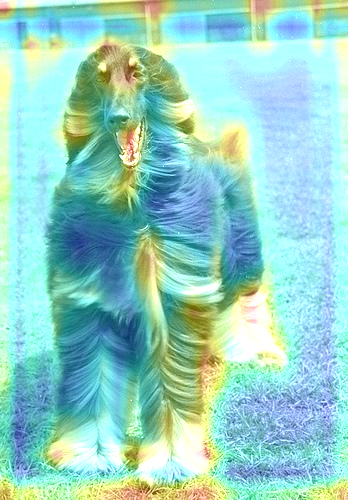

In [ ]:
heatmap_plus = grad_cam_plus(new_model, img_[0], layer_name="block4_conv3")
show_imgwithheat(_analyse, heatmap_plus)